<a href="https://colab.research.google.com/github/ShahdTarek/Boston-Housing-Prediction-with-ANN/blob/main/Boston_Housing_Prediction_with_ANN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Boston Housing Data Price Prediction
Housing Values in Suburbs of Boston
The medv variable is the target variable.

Data description
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.

Source
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.

Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv('BostonHousing.csv')
df.head(5)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#Drooping the label and creating sperated df for it
X=df.drop(['medv'],1)
y=df['medv']

#making object of StandardScaler class
scaler=StandardScaler()

#extracting the indexs/columns
columns=X.columns

#tansforming the data into a standrlized and less variance form "Bais calculation per feature"
X=scaler.fit_transform(X)

#creating a new df that cotain bais per feature only
X=pd.DataFrame(X,columns=columns)

#Spliting bais data 'X' and label data
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

print('X_train shape',X_train.shape)
print('y_train shape',y_train.shape)
print('X_test shape',X_test.shape)
print('y_test shape',y_test.shape)

X_train shape (354, 13)
y_train shape (354,)
X_test shape (152, 13)
y_test shape (152,)


In [ ]:
'''
Note:
input_neurons : first layer of neurons
hidden_neurons : perceptrons
output_neurons : output layer
inputs : data/x
weights_input_hidden : the updated weights of inputs
weights_hidden_output : the updated weights of neurons
hidden_inputs : the Accumlated weights/Z
hidden_outputs : the activation function result/A
hidden_grad : the cost function
predictions :  y^
target : y


'''


class Neural_Network():
    def __init__(self,input_neurons,hidden_neurons,output_neurons,learning_rate):

      #initlizing a random weight per neuron the output is between
      #the weights_input_hidden is now array of probabilities between -0.5 and 0.5 distributied baseed on the number of hidden_neurons and input_neurons
        self.weights_input_hidden= np.random.uniform(-0.5,0.5,(hidden_neurons,input_neurons))

      #initlizing a random prediction per neuron
      #the weights_input_hidden is now array of probabilities between -0.5 and 0.5 distributied baseed on the number of output_neurons and hidden_neurons
        self.weights_hidden_output= np.random.uniform(-0.5,0.5,(output_neurons,hidden_neurons))
        self.lr=learning_rate

    #sigmoid firing mechanism to decide importance of neuron x output
    def activation(self,x):
        return 1/(1+np.exp(-x))

    #calculating the weights , actiavting neurons and giving predictions
    def forward(self,inputs):

        #making transpoesd 2D array of all records/inputs
        self.inputs =np.array(inputs,ndmin=2).T

        # z1 = w1.x1
        hidden_inputs=np.dot(self.weights_input_hidden ,self.inputs)

        # A1 = a(z1)
        self.hidden_outputs=self.activation(hidden_inputs)

        # z2= w2.A1
        final_inputs=np.dot(self.weights_hidden_output ,self.hidden_outputs)
        final_outputs=final_inputs
        return final_outputs

    #calculating the error by comparing y^ with actual y
    def backward(self,target,predictions):

      # E = y-y^
        output_error =target - predictions

      #cost function of the gradient decent => the partial drevative of E / the partial drevative w1 , to calculate the error per input
        hidden_grad=np.dot(self.weights_hidden_output.T, output_error) *(self.hidden_outputs *(1-self.hidden_outputs))

        #Tuning the weights and z with new parameters
        # w2 'new'  = w2 'old' + learning rate * A2
        self.weights_hidden_output += (self.lr)* output_error * self.hidden_outputs.T

        # w1'new' = w1'old' + learning rate * drevative of E / the partial drevative w1 * X
        self.weights_input_hidden += (self.lr)* hidden_grad * self.inputs.T

    # calculating the mean squared error
    def MSE(self,target,prediction):

      # the result is the mean of summation of all errors divided by number of label/y
        return (np.sum(target - prediction) **2)/len(target)



In [ ]:
X_train.shape[1]

13

In [ ]:
# the network will have 13 input/neuron/feature in the input layer (based on number of features that we have in our dataset)
input_neurons= X_train.shape[1]

# 32 neuron in the hidden layer
hidden_neurons= 32

# one prediction per cycle
output_neurons=1

# will be shifting in the learning curve by 0.01 as a step
learning_rate=0.01

# 1000 cycle of F.P and B.P
epochs= 1000

# giving our hyperparameter as input to the network that is represented in a variable named model
model=Neural_Network(input_neurons,hidden_neurons,output_neurons,learning_rate)


In [ ]:
import sys
losses= {'train':[],'valid':[]}
for epoch in range(epochs) :

  # splitting data into 8 batches randomly by chossing different column/feature each time
    batch=np.random.choice(X_train.index,size= 8)

    #making tubles of x data values and y data values based on number of batches
    for record,target in zip (X_train.loc[batch].values,y_train.loc[batch].values):

        # passing values to the forward function to start making predictions based on the current batch
        preds=model.forward(record)

        # optimizing the weights and calculating the error based on the current batch
        model.backward(target,preds)

        # calculating the loss/difference true training data and the predicted data while training
    train_loss= model.MSE(y_train,model.forward(X_train)[0])

    # calculating the loss/difference true validation data and the predicted data while validating
    valid_loss=model.MSE(y_test,model.forward(X_test)[0])

    sys.stdout.write("\r PROGRES : "+ str ( 100 *epoch / float(epochs))[:4] + "%.. Training loss :" +str(train_loss)[:5] + "%.. Validation loss :" +str(valid_loss)[:5])
    losses['train'].append(train_loss)
    losses['valid'].append(valid_loss)

 PROGRES : 99.9%.. Training loss :188.5%.. Validation loss :56.88

In [ ]:
result=pd.DataFrame()
result['Preds']=model.forward(X_test)[0]
result['Actual']=y_test.values
result

,Preds,Actual
0,17.686986,16.7
1,14.581315,14.6
2,25.592138,18.6
3,20.124572,19.4
4,9.266529,5.6
...,...,...
147,13.006590,14.4
148,34.603991,35.4
149,14.061884,12.6
150,13.035788,13.9


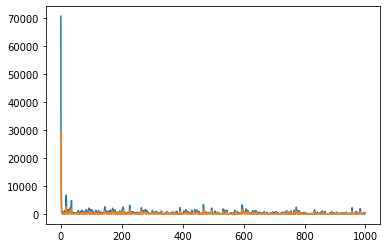

'\nfrom the show diagram the traing loss was very high at the begin of training then decreased \n\nand the val loss started high too but less than the traing loss and decreased nearly to 0\n'

In [ ]:
import matplotlib.pyplot as plt
plt.plot(losses['train'],label='Training Loss')
plt.plot(losses['valid'],label='Validation Loss')
plt.show()

'''
from the show diagram the traing loss was very high at the begin of training then decreased

and the val loss started high too but less than the traing loss and decreased nearly to 0
'''